In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

In [2]:
data = pd.read_csv('ex1data2.txt', header=None)

In [31]:
data_X = data[[0,1]]
data_Y = data[2]
data_M = data_X.shape[0]


# X0 needs to be appended to data_X
data_X = pd.concat( [
    pd.Series(np.ones(data_M)),
    data_X
    ],  axis = 1)
data_X.columns = [0, 1, 2]
print("X shape:{}".format(data_X.shape))

# Cleanup data_Y
data_Y = data_Y.reshape(data_Y.shape[0], 1)
print("Y shape:{}".format(data_Y.shape))

X shape:(47, 3)
Y shape:(47, 1)


In [32]:
data.head() #2 = y

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [33]:
data_X_Norm = ( data_X - data_X.mean() ) / data_X.std()
data_X_Norm[0] = 1
data_X_Norm.head()

,0,1,2
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


Final Theta:
[[ 334302.06344143]
 [ 100087.11558706]
 [   3673.54883909]]


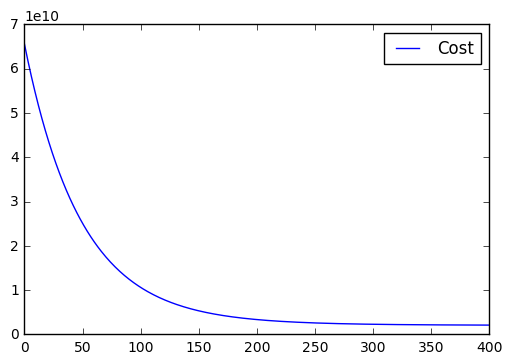

In [42]:
# Tweak params
learning_rate = 0.01
iterations = 400

# Gradient Descent Code
tf.reset_default_graph() #reset all placeholder's if we are running this cell multiple times

x = tf.placeholder(tf.float64)
y = tf.placeholder(tf.float64) 
m = tf.constant(data_M , dtype=tf.float64)

# h(x) = 𝜃'x
theta = tf.Variable(tf.zeros([3, 1], dtype=tf.float64), dtype=tf.float64)
hx = tf.matmul(x, theta)

J = tf.div(tf.reduce_mean(tf.square(tf.sub(hx, y))),2.0)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(J)

with tf.Session() as sess:    
    J_hist = np.zeros(iterations)
    sess.run(tf.initialize_all_variables())
    
    for i in range(iterations):
        _, J_hist[i] = sess.run([optimizer, J], feed_dict={x: data_X_Norm, y : data_Y})
    
    finalTheta = sess.run(theta)

print("Final Theta:")
print(finalTheta)

plt.plot(J_hist, label='Cost')
plt.legend()